In [6]:
"""
Input format for internalwave_analyzer
sensor-level-buoy-east.sen:
sensor	position (m)	specification
1	0.2	1
2	1.2	1
3	2.2	1

+
temp_milada_east.tem:
Year 	 Month 	 Day 	 Hour 	 Minute 	T1 	 T2 	 T3
2015	7	1	0	0	20.615	20.615	20.329
2015	7	1	0	5	20.519	20.615	20.329
2015	7	1	0	10	20.519	20.519	20.234
2015	7	1	0	15	20.519	20.519	20.329
"""

'\nInput format for internalwave_analyzer\nsensor-level-buoy-east.sen:\nsensor\tposition (m)\tspecification\n1\t0.2\t1\n2\t1.2\t1\n3\t2.2\t1\n\n+\ntemp_milada_east.tem:\nYear \t Month \t Day \t Hour \t Minute \tT1 \t T2 \t T3\n2015\t7\t1\t0\t0\t20.615\t20.615\t20.329\n2015\t7\t1\t0\t5\t20.519\t20.615\t20.329\n2015\t7\t1\t0\t10\t20.519\t20.519\t20.234\n2015\t7\t1\t0\t15\t20.519\t20.519\t20.329\n'

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
input_folder_name = "lexplore_summer_2021"
date_start = np.datetime64("2021-06-01")
date_end = np.datetime64("2021-08-01")

input_nc_name = "thermochain_2021"

input_nc_path = rf"..//runs//{input_folder_name}//raw_input//{input_nc_name}.nc"
output_sen_path = rf"..//runs//{input_folder_name}//sensor-{input_nc_name}.sen"
output_temp_path = rf"..//runs//{input_folder_name}//temp_{input_nc_name}.tem"



# Load data

In [3]:
temp_variable_name = 'temp'

In [13]:
input_data = xr.open_dataset(input_nc_path)

input_data = input_data.isel(depth = range(23))

In [19]:
input_data = input_data.sel(time=slice(date_start, date_end)).dropna(dim="time", how="all", subset=["temp"])
input_data = input_data.sel(time=slice(date_start, date_end)).dropna(dim="depth", how="any", subset=["temp"])

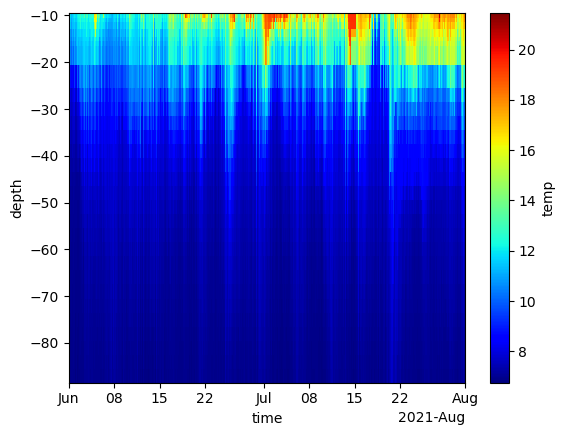

In [20]:
input_data['temp'].plot(cmap='jet')

# Convert Netcdf to Dataframe

In [21]:
# Extract data
depths = -input_data.depth.values
times = input_data.time.values
temps = input_data[temp_variable_name].values.T

### .sen file

In [22]:
df_sen = pd.DataFrame(np.array([list(range(len(depths))), depths, np.ones(len(depths), dtype=int)]).T, columns=["sensor", "position (m)", "specification"])

In [23]:
df_sen['sensor'] = df_sen['sensor'].astype(int)
df_sen['specification'] = df_sen['specification'].astype(int)

In [32]:
df_sen

,sensor,position (m),specification
0,0,10.0,1
1,1,11.0,1
2,2,12.0,1
3,3,14.0,1
4,4,15.0,1
5,5,16.0,1
6,6,17.0,1
7,7,24.0,1
8,8,27.0,1
9,9,30.0,1


### .tem file

In [25]:
column_names = ["Year", "Month", "Day", "Hour", "Minute"]
for idx in range(len(depths)):
    column_names.append(f"T{idx+1}")

In [26]:
column_names

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'T6',
 'T7',
 'T8',
 'T9',
 'T10',
 'T11',
 'T12',
 'T13',
 'T14',
 'T15',
 'T16',
 'T17',
 'T18',
 'T19',
 'T20',
 'T21',
 'T22',
 'T23',
 'T24',
 'T25',
 'T26',
 'T27',
 'T28',
 'T29']

In [27]:
# Build a list of rows
rows = []
for t, temp in zip(times, temps):
    dt = pd.to_datetime(t).to_pydatetime()
    rows.append([
        dt.year,
        dt.month,
        dt.day,
        dt.hour,
        dt.minute,
        *temp,
    ])

# Create DataFrame
df_temp = pd.DataFrame(rows, columns=column_names)

In [28]:
df_temp

,Year,Month,Day,Hour,Minute,T1,T2,T3,T4,T5,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
0,2021,6,1,0,0,11.474600,11.472500,11.383900,11.098400,10.999300,...,7.086000,7.065300,7.000600,6.963000,6.970900,6.972900,6.963300,6.960900,6.956500,6.932800
1,2021,6,1,0,10,11.474648,11.461334,11.370972,11.101325,11.011556,...,7.095274,7.067848,7.021972,6.959123,6.960382,6.962575,6.963069,6.957080,6.952544,6.921923
2,2021,6,1,0,20,11.472857,11.440657,11.352443,11.109249,11.003013,...,7.094548,7.063136,6.988508,6.956349,6.956034,6.952941,6.942511,6.941516,6.933990,6.892021
3,2021,6,1,0,30,11.484082,11.449933,11.374718,11.174626,11.129197,...,7.091159,7.068485,7.011618,6.956218,6.951464,6.945411,6.936279,6.926830,6.920274,6.893018
4,2021,6,1,0,40,11.541156,11.459893,11.392144,11.237166,11.171087,...,7.078593,7.041793,7.010223,6.987587,6.957848,6.936369,6.926818,6.922395,6.910339,6.878277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2021,7,31,21,20,18.177789,17.836962,16.985164,15.610170,15.553408,...,7.526023,7.443030,7.369670,7.327518,7.269702,7.221384,7.169634,7.126831,7.094674,7.012803
8755,2021,7,31,21,30,18.131074,17.790102,17.103684,15.800084,15.533511,...,7.491989,7.421641,7.350707,7.285777,7.261764,7.211661,7.153885,7.123518,7.092548,7.004284
8756,2021,7,31,21,40,18.204264,18.027949,17.225503,16.105384,15.635816,...,7.469854,7.404908,7.347297,7.291795,7.263841,7.219959,7.164887,7.134346,7.098018,7.030289
8757,2021,7,31,21,50,18.115059,17.829362,17.151431,16.191193,15.698072,...,7.484325,7.406502,7.345870,7.310697,7.269382,7.228887,7.170685,7.148613,7.098246,7.044266


# Save

In [31]:
output_sen_path

'..//runs//lexplore_summer_2021//sensor-thermochain_2021.sen'

In [29]:
df_sen.to_csv(output_sen_path, sep="\t", index=False)

In [30]:
df_temp.to_csv(output_temp_path, sep="\t", index=False)